In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import json

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Preparation and Data Reading

In [24]:
def performance_representation_plot(data_predictions_array, data_truth_array, title,
                                    title_in_plot=True, save_file=False, print_plot=True, upper_border=True, legend_font_size="medium",
                                    axis_value_size="medium", axis_label_size="medium"):
    
        
    fig = plt.figure(figsize=(30,10))
    plt.xlabel("Horas", fontdict={"fontsize":axis_label_size})
    plt.tick_params(axis="both", labelsize=axis_value_size)
    plt.title(title) if title_in_plot else print(title)
    plt.ylabel("Viagens requisitadas por hora", fontdict={"fontsize":axis_label_size})
    plt.plot(data_truth_array, "ok", label="Valores Reais")
    plt.plot(data_predictions_array, "--b", label="Valores Previstos")
    if(not upper_border):
        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.legend(fontsize=legend_font_size, loc=1)
    plt.savefig("plots\\" + title.replace(" ", "_")+ ".png", bbox_inches='tight') if save_file else print()
    plt.show() if print_plot else print()

In [25]:
evo_data = np.loadtxt(r"results/LSTM_Evo_Multivariable_Predictions_by12Hrs.txt", delimiter=",")
evo_data_single_var = np.loadtxt(r"results/LSTM_Evo_Single_Variable_Predictions_by12Hrs.txt", delimiter=",")
modo_data = np.loadtxt(r"results/LSTM_Modo_Multivariable_Predictions_by12Hrs.txt", delimiter=",")
modo_data_single_var = np.loadtxt(r"results/LSTM_Modo_Single_Variable_Predictions_by12Hrs.txt", delimiter=",")
c2g_data = np.loadtxt(r"results/LSTM_Car2Go_Multivariable_Predictions_by12Hrs.txt", delimiter=",")
c2g_data_single_var = np.loadtxt(r"results/LSTM_Car2Go_Single_Variable_Predictions_by12Hrs.txt", delimiter=",")

## Plot Generation

In [26]:
plot_styling = {
    "title_in_plot":False,
    "save_file":True,
    "print_plot":True,
    "upper_border":False,
    "legend_font_size":36,
    "axis_value_size":32,
    "axis_label_size":34
}

In [27]:
evo_data_single_var

array([[463.41760254, 389.02658081, 323.36471558, 208.51542664,
        135.63781738,  92.06861115,  59.63075638,  57.96848679,
        115.7956543 , 223.18960571, 396.37179565, 496.79092407,
        332.08660889, 305.09570312, 302.05197144, 377.75192261,
        463.76522827, 550.82580566, 666.265625  , 650.37341309,
        598.91687012, 481.24981689, 416.87982178, 317.55877686,
        299.3223877 , 196.89472961, 104.26234436,  50.50941849,
         20.20738411,  17.35601234, 101.04029083, 276.56057739,
        409.45410156, 474.87802124, 442.64294434, 370.5670166 ,
        322.15335083, 310.00375366, 314.76867676, 397.62084961,
        495.9593811 , 570.91394043, 673.081604  , 644.1005249 ,
        583.37884521, 464.22146606, 403.70053101, 307.32357788],
       [188.        , 109.        ,  47.        ,  42.        ,
         27.        ,  61.        , 155.        , 370.        ,
        485.        , 458.        , 310.        , 271.        ,
        298.        , 297.        , 298

Evo Multivariable


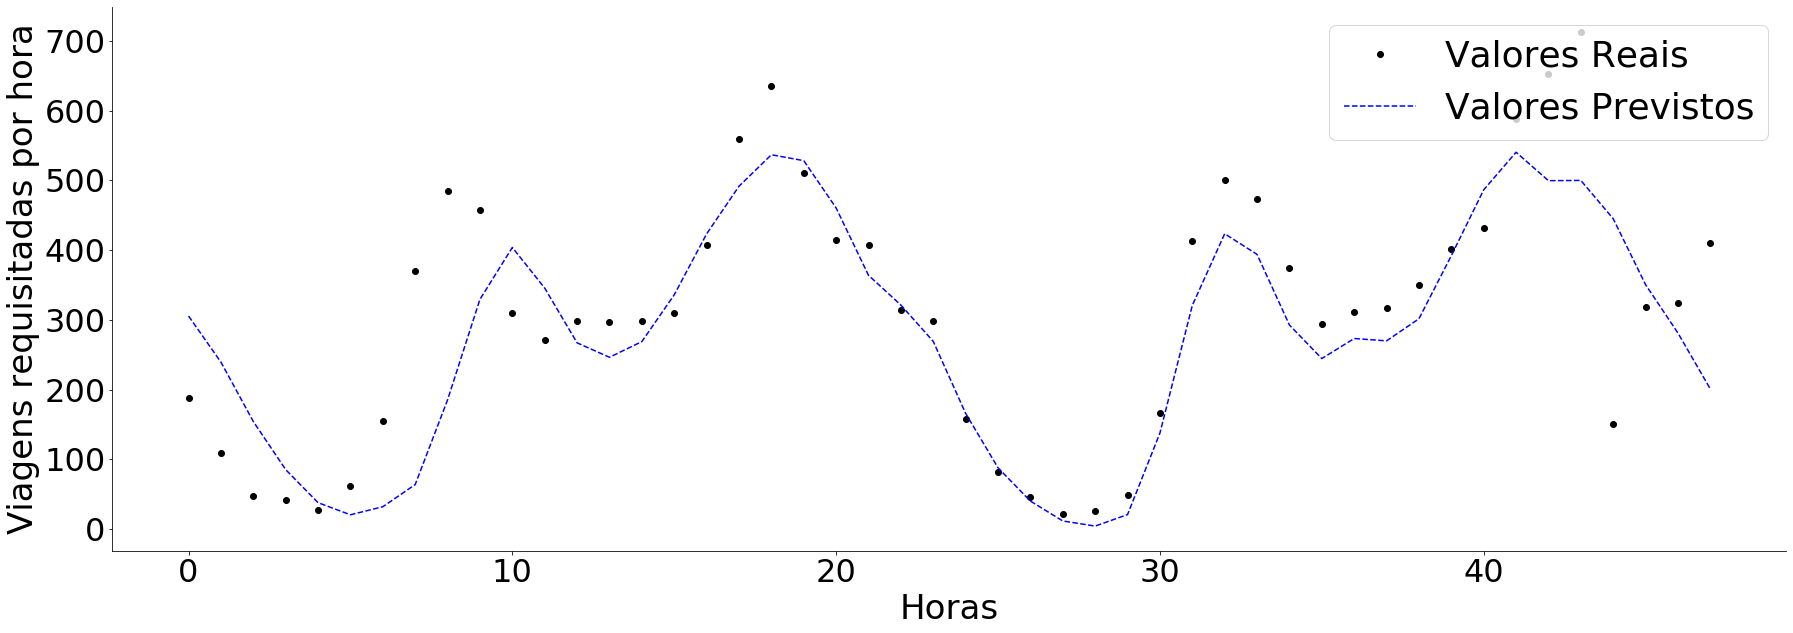

Evo Univariable


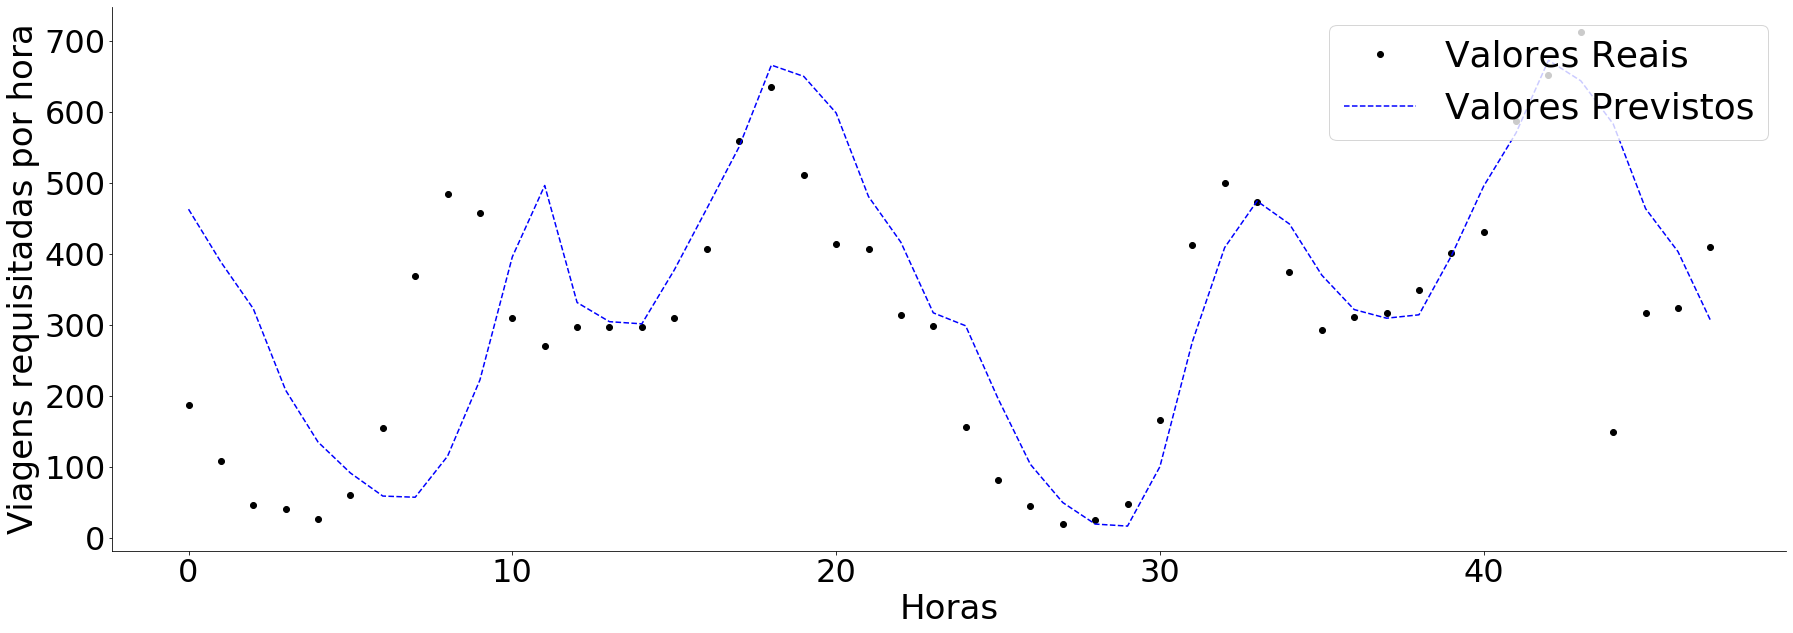

Modo Multivariable


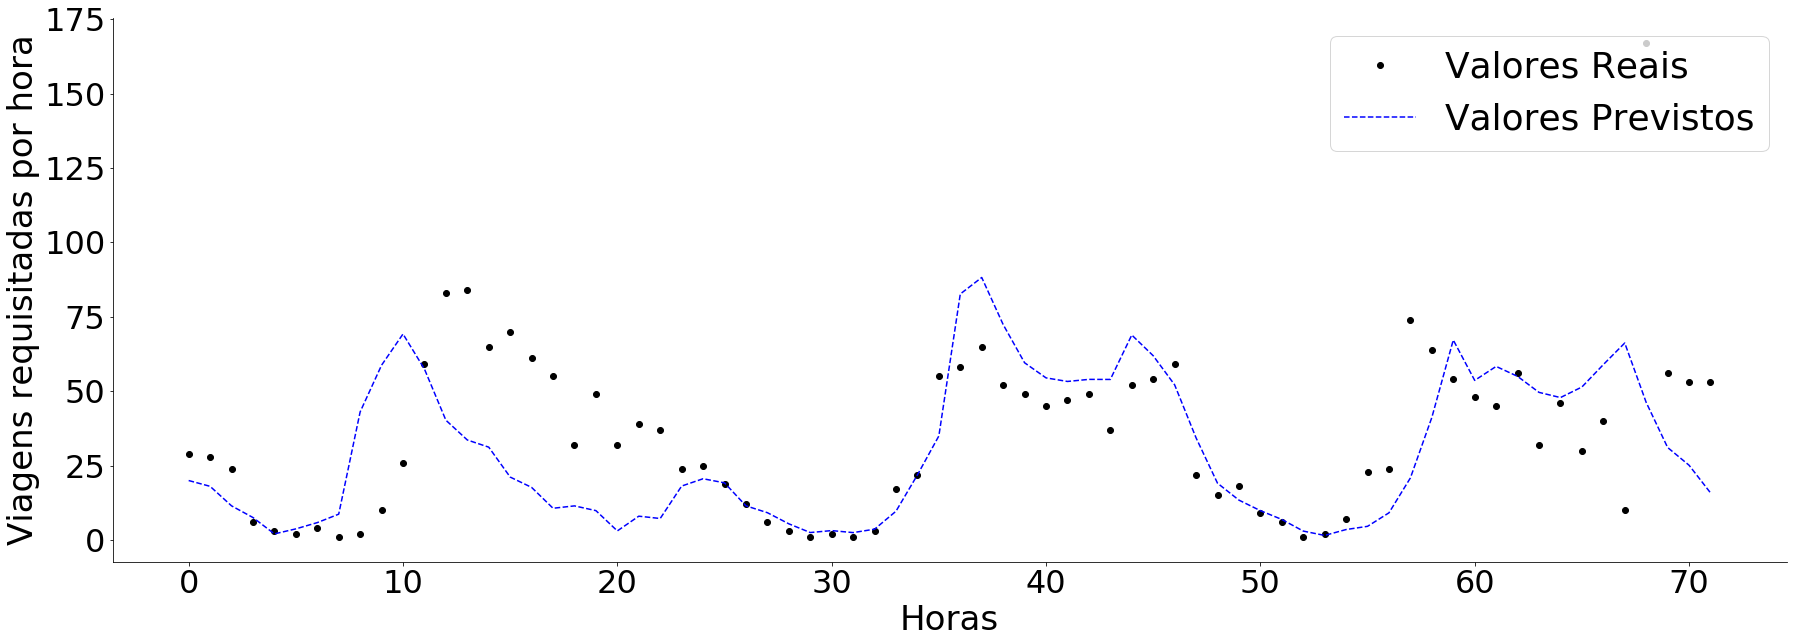

Modo Univariable


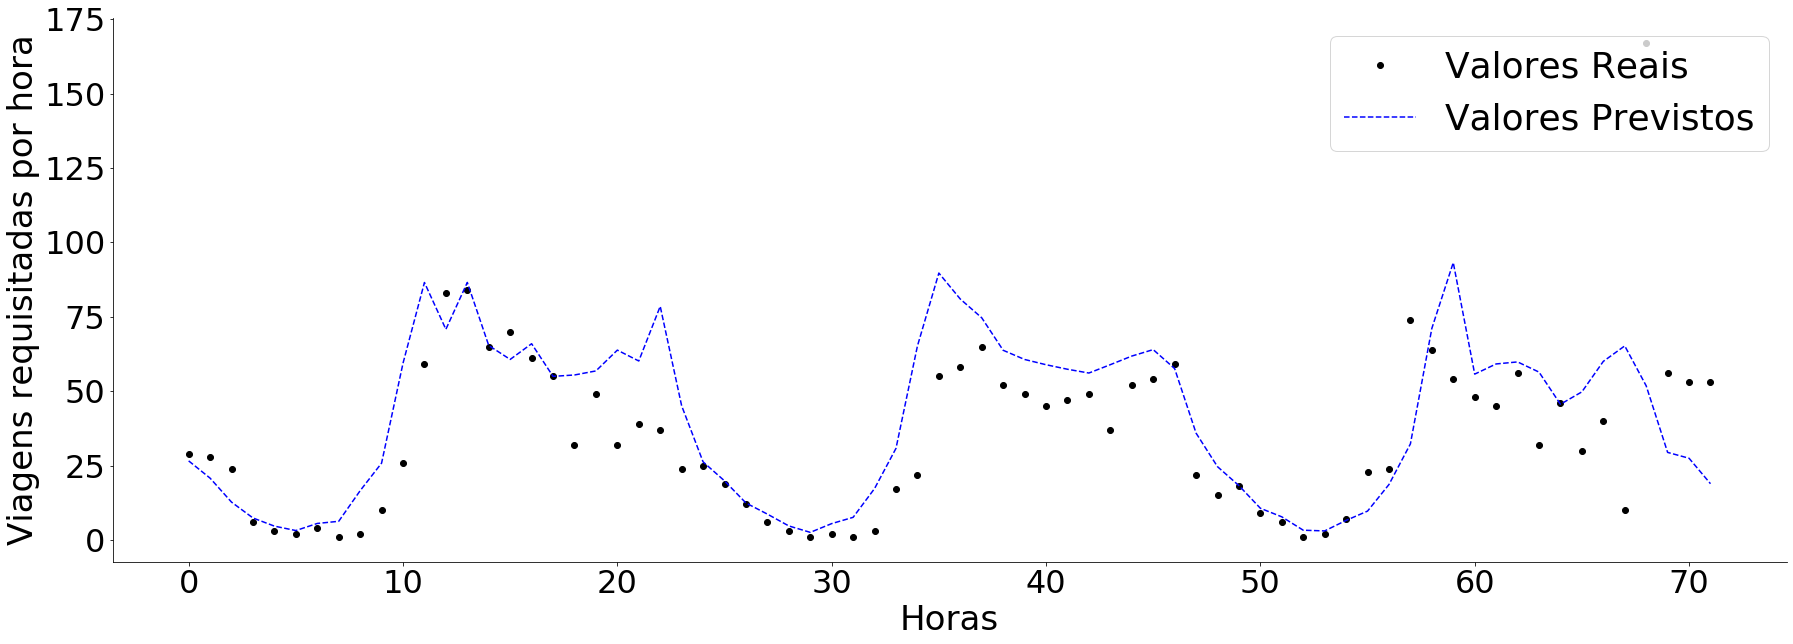

Car2Go Multivariable


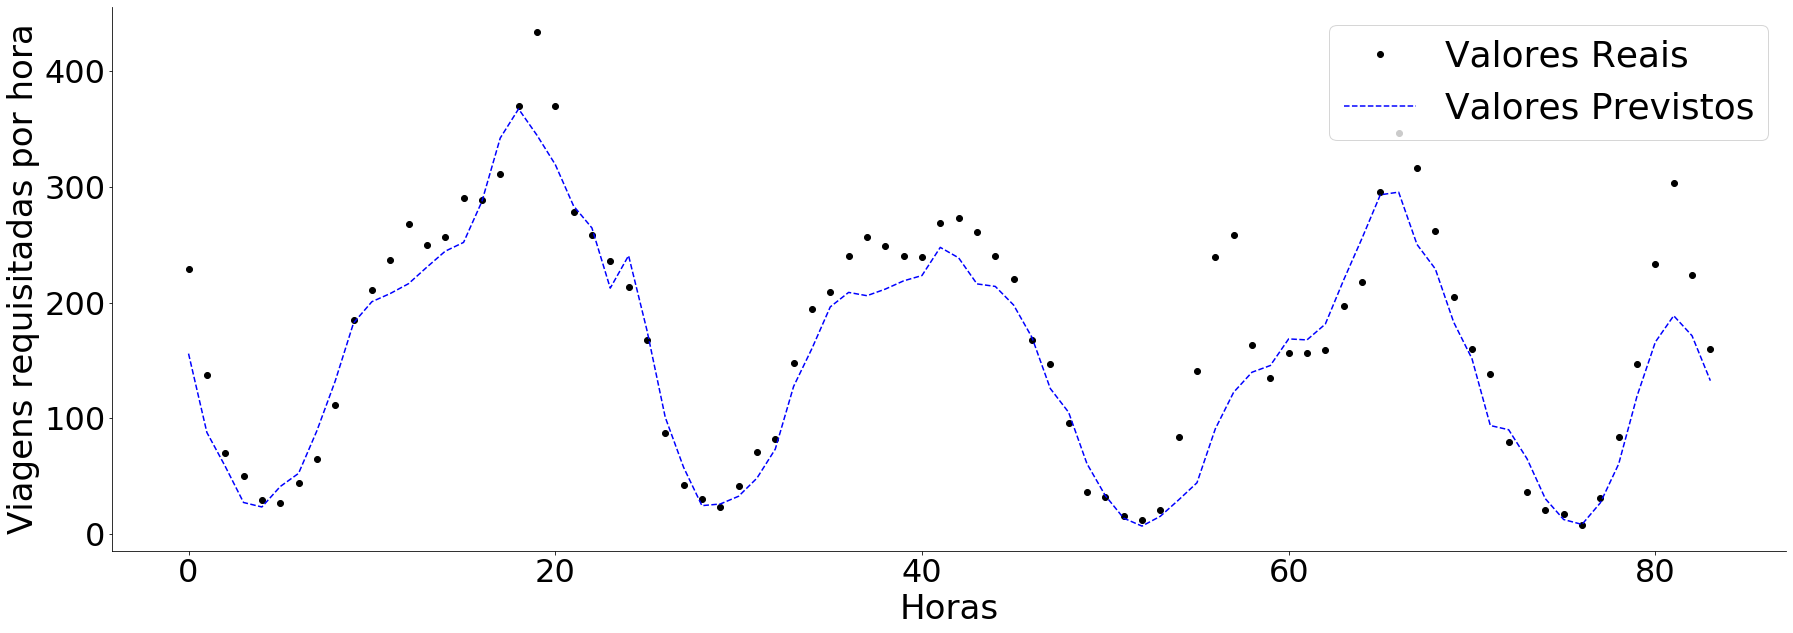

Car2Go Univariable


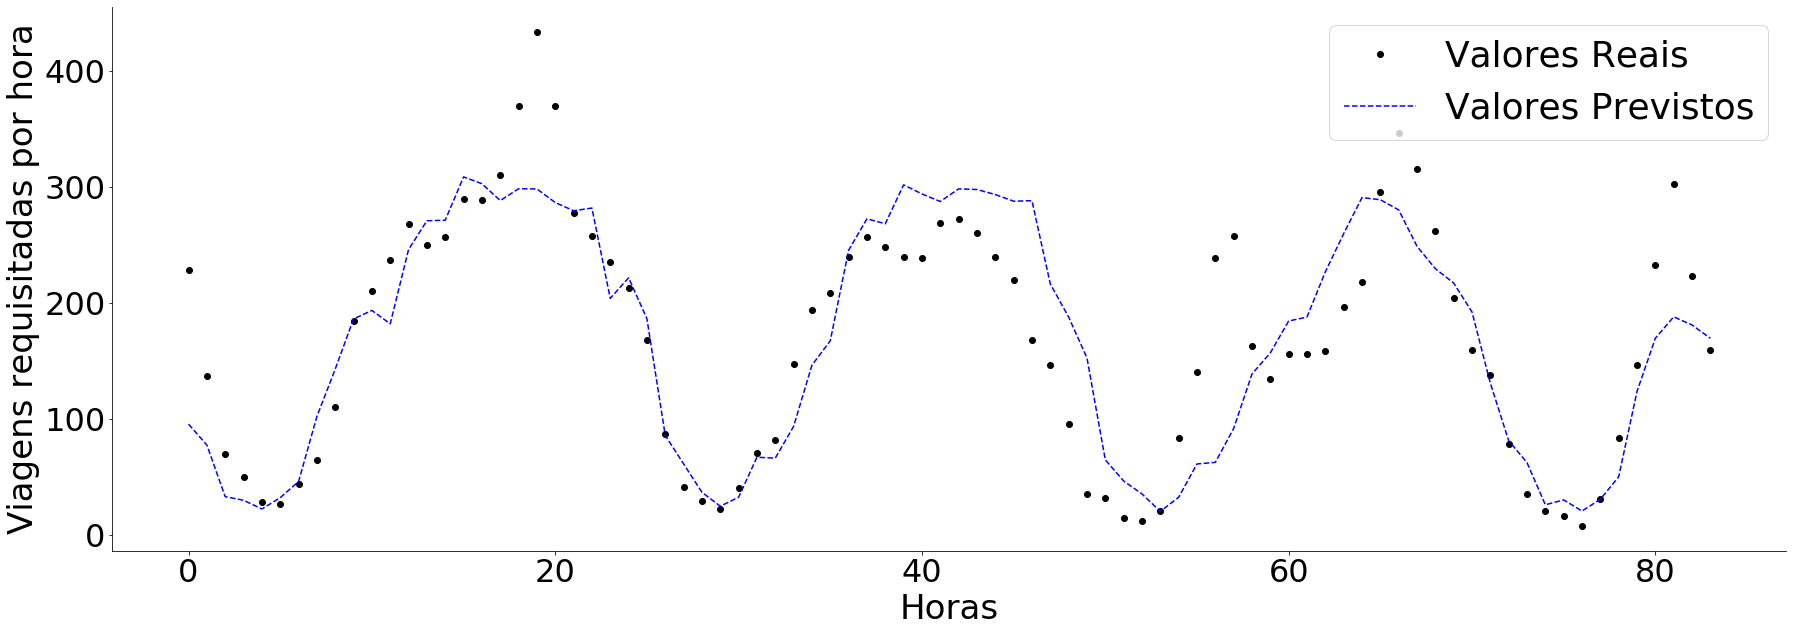

In [28]:
performance_representation_plot(evo_data[0], evo_data[1], "Evo Multivariable", **plot_styling)
performance_representation_plot(evo_data_single_var[0], evo_data_single_var[1], "Evo Univariable", **plot_styling)
performance_representation_plot(modo_data[0], modo_data[1], "Modo Multivariable", **plot_styling)
performance_representation_plot(modo_data_single_var[0], modo_data_single_var[1], "Modo Univariable", **plot_styling)
performance_representation_plot(c2g_data[0], c2g_data[1], "Car2Go Multivariable", **plot_styling)
performance_representation_plot(c2g_data_single_var[0], c2g_data_single_var[1], "Car2Go Univariable", **plot_styling)

## Table Generation

In [7]:
def gen_dict(path):
    f = open(path)
    new_dict = json.load(f)
    f.close()
    return new_dict

In [8]:
unievo_eval = gen_dict(f"results\LSTM_Evo_Single_Variable_Results.json")
unic2g_eval = gen_dict(f"results\LSTM_Car2Go_Single_Variable_Results.json")
unimodo_eval = gen_dict(f"results\LSTM_Modo_Single_Variable_Results.json")
evo_eval = gen_dict(f"results\LSTM_Evo_Multivariable_Results.json")
c2g_eval = gen_dict(f"results\LSTM_Car2Go_Multivariable_Results.json")
modo_eval = gen_dict(f"results\LSTM_Modo_Multivariable_Results.json")

In [9]:
uni_table = pd.DataFrame({"Evo":unievo_eval, "Modo":unimodo_eval, "Car2Go":unic2g_eval}).T
uni_table.index.name = "Serviço"
uni_table

,RMSE,MAE,R2
Serviço,,,
Evo,173.876613,121.156398,0.003630
Modo,23.558731,15.378326,0.251994
Car2Go,48.704347,36.442230,0.771989


In [10]:
multi_table = pd.DataFrame({"Evo":evo_eval, "Modo":modo_eval, "Car2Go":c2g_eval}).T
multi_table.index.name = "Serviço"
multi_table

,RMSE,MAE,R2
Serviço,,,
Evo,160.234530,94.925282,0.147275
Modo,26.450156,17.900805,0.060296
Car2Go,40.204653,27.905731,0.843792


In [11]:
multi_table.to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &        RMSE &        MAE &        R2 \\\\\nServiço &             &            &           \\\\\n\\midrule\nEvo     &  160.234530 &  94.925282 &  0.147275 \\\\\nModo    &   26.450156 &  17.900805 &  0.060296 \\\\\nCar2Go  &   40.204653 &  27.905731 &  0.843792 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [12]:
uni_table_file = open('results\\Univariable_Latex_Table.txt', "w")
uni_table_file.write(uni_table.to_latex())
uni_table_file.close()

multi_table_file = open("results\\Multivariable_Latex_Table.txt", "w")
multi_table_file.write(multi_table.to_latex())
multi_table_file.close()